Ecole Normale Supérieure de l'Enseignement Technique - Mohammedia<br>
Master : Systèmes Distribués et Intelligence Artificielle<br>
Module : Bases de l'intellegence artificielle<br>
<b>IGUIDER Amine</b><br>
Année universitaire 2023 - 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("gene_expression.csv")

In [3]:
data

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [4]:
data.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [5]:
data.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [6]:
data.rename(columns=dict(zip(data.columns, data.columns.str.replace(' ', ''))), inplace=True)

In [7]:
data

,GeneOne,GeneTwo,CancerPresent
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [8]:
features = data.drop('CancerPresent', axis=1)
target = data.CancerPresent

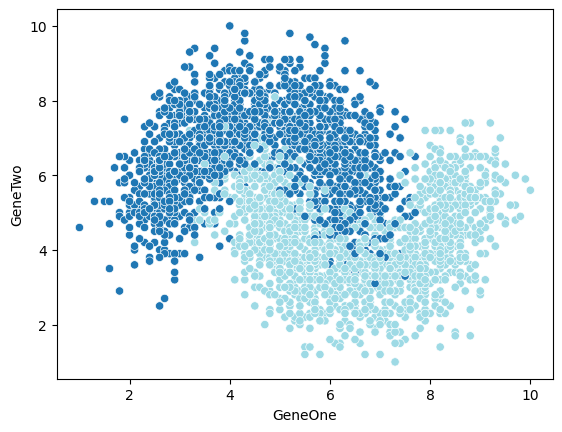

In [9]:
sns.scatterplot(data=features, x='GeneOne',y='GeneTwo', c=target, cmap='tab20', edgecolors='white')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.4, stratify=target)

# Classification : k-plus proches voisins

## Modèle

In [11]:
def knn(x, k, X_ref, Y_ref):
    # print(X_train.subtract(row))
    distances = ((X_ref - x) ** 2).sum(axis=1)
    min_index = distances.nsmallest(k).index
    mode = Y_ref[min_index].mode()
    return mode.iloc[0]

In [12]:
knn((3, 5), 5, X_train, Y_train)

0

In [13]:
knn((3, 6), 3, X_train, Y_train)

0

## Prédictions (k = 3)

### Réalisation des prédictions

In [14]:
k = 3

In [15]:
def predict(X, k, X_ref, Y_ref):
    return X.apply(lambda x : knn(x, k, X_ref, Y_ref), axis=1).rename("Prediction")

In [16]:
predictions = predict(X_test, k, X_train, Y_train)

In [17]:
predictions

793     0
1723    0
108     1
1382    0
2361    1
       ..
984     1
222     0
2972    1
742     0
521     0
Name: Prediction, Length: 1200, dtype: int64

In [18]:
d_test_pred_t = pd.concat([X_test, Y_test, predictions], axis=1)

In [19]:
d_test_pred_t

,GeneOne,GeneTwo,CancerPresent,Prediction
793,4.8,6.4,0,0
1723,6.0,4.6,1,0
108,8.2,4.2,0,1
1382,4.4,8.2,0,0
2361,4.2,5.9,1,1
...,...,...,...,...
984,7.0,2.8,1,1
222,5.6,6.5,0,0
2972,9.3,5.5,1,1
742,5.7,6.8,0,0


### Evaluation des prédictions

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm_test = confusion_matrix(Y_test, predictions)

In [22]:
cm_test

array([[552,  48],
       [ 45, 555]], dtype=int64)

<Axes: >

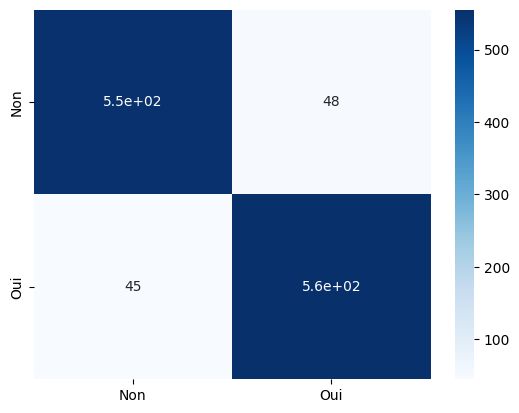

In [23]:
sns.heatmap(cm_test, annot=True, cmap='Blues', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(Y_test, predictions)

0.9225

### Fausses prédictions

In [26]:
_wrong_condition = d_test_pred_t.Prediction != d_test_pred_t.CancerPresent

In [27]:
_wront_predictions = d_test_pred_t[_wrong_condition]

In [28]:
_wront_predictions

,GeneOne,GeneTwo,CancerPresent,Prediction
1723,6.0,4.6,1,0
108,8.2,4.2,0,1
2766,5.1,6.3,0,1
1728,3.3,4.8,1,0
1248,5.6,6.4,1,0
...,...,...,...,...
206,6.6,4.7,1,0
775,4.1,6.1,0,1
2435,4.9,6.5,0,1
753,4.8,6.9,1,0


In [29]:
_wront_predictions.shape

(93, 4)

### Prédictions correctes

In [30]:
_correct_condition = d_test_pred_t.Prediction == d_test_pred_t.CancerPresent

In [31]:
_correct_predictions = d_test_pred_t[_correct_condition]

In [32]:
_correct_predictions

,GeneOne,GeneTwo,CancerPresent,Prediction
793,4.8,6.4,0,0
1382,4.4,8.2,0,0
2361,4.2,5.9,1,1
804,3.0,3.9,0,0
2057,5.1,3.7,1,1
...,...,...,...,...
984,7.0,2.8,1,1
222,5.6,6.5,0,0
2972,9.3,5.5,1,1
742,5.7,6.8,0,0


### Visualisation des prédictions

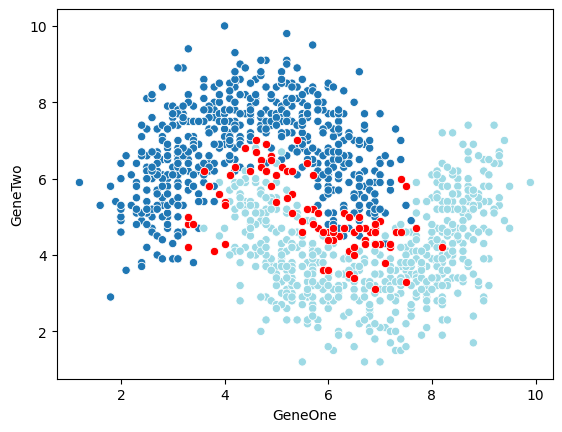

In [70]:
plt.scatter(data=_correct_predictions, x='GeneOne',y='GeneTwo', c='Prediction', cmap='tab20', edgecolors='white', linewidth = 0.6)
plt.scatter(data=_wront_predictions, x='GeneOne', y='GeneTwo', color='red', edgecolors='white', linewidth = 0.6)
plt.xlabel('GeneOne')
plt.ylabel('GeneTwo')
plt.show()

## Processus de cross-validation et choix du k

### Determination du k

In [34]:
folds = 3 # Nombre de divisions du dataset
size_fact = len(X_train) / folds
k_range = range(3, 50, 2) # Définir l'intervalle ou l'ensemble de k à tester
X_train_rd = X_train.sample(frac=1) # Changer l'ordre du dataset aléatoirement

In [35]:
print(*k_range)

3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49


In [36]:
X_train_rd

,GeneOne,GeneTwo
331,2.9,8.3
2081,4.1,7.9
1932,5.5,7.3
841,8.3,5.3
362,5.5,3.5
...,...,...
2581,3.8,6.0
1584,2.7,5.1
2383,7.8,3.3
619,6.8,4.2


In [37]:
cv_matrix = np.zeros((folds, len(k_range)))

In [38]:
cv_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [39]:
for i in range(folds):
    s = slice( int(i*size_fact), int((i+1)*size_fact), 1)
    # Dataset extraite 
    X = X_train_rd.iloc[s]
    # Refrence 
    X_ref = X_train.drop(X.index)
    Y_ref = Y_train.loc[X_ref.index]
    cv_matrix[i] = np.array([ accuracy_score(Y_train.loc[X.index], predict(X, j, X_ref, Y_ref)) for j in k_range])
    

In [40]:
cv_matrix

array([[0.92666667, 0.93      , 0.92833333, 0.92333333, 0.925     ,
        0.935     , 0.935     , 0.93333333, 0.93333333, 0.935     ,
        0.935     , 0.93333333, 0.93333333, 0.93833333, 0.935     ,
        0.93166667, 0.92833333, 0.92833333, 0.93      , 0.93      ,
        0.93333333, 0.93166667, 0.93333333, 0.93333333],
       [0.90166667, 0.92      , 0.92      , 0.925     , 0.925     ,
        0.92666667, 0.92833333, 0.92666667, 0.92333333, 0.92333333,
        0.925     , 0.925     , 0.92333333, 0.92833333, 0.92833333,
        0.92833333, 0.93      , 0.92833333, 0.92833333, 0.925     ,
        0.92833333, 0.92833333, 0.92833333, 0.92666667],
       [0.91333333, 0.91833333, 0.92666667, 0.92166667, 0.92333333,
        0.92666667, 0.92666667, 0.925     , 0.925     , 0.925     ,
        0.92333333, 0.93166667, 0.93166667, 0.93      , 0.93      ,
        0.92833333, 0.92833333, 0.92833333, 0.93      , 0.93      ,
        0.92833333, 0.92666667, 0.92666667, 0.92666667]])

<Axes: >

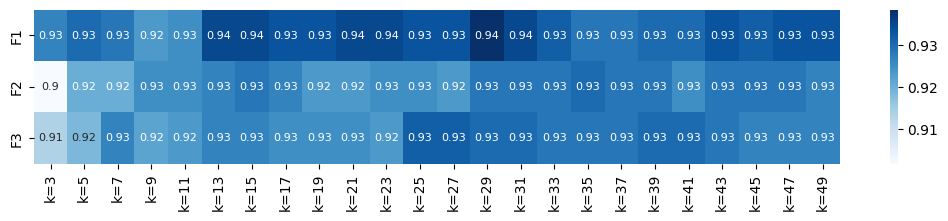

In [41]:
fig, ax = plt.subplots(figsize=(13,2))
sns.heatmap(
    cv_matrix,
    annot=True,
    cmap='Blues',
    annot_kws = {"size": 8},
    ax = ax,
    yticklabels=[f"F{i+1}" for i in range(folds)],
    xticklabels=[f"k={j}" for j in k_range]
)

In [42]:
k_mean = cv_matrix.mean(axis=0)

In [43]:
k_mean

array([0.91388889, 0.92277778, 0.925     , 0.92333333, 0.92444444,
       0.92944444, 0.93      , 0.92833333, 0.92722222, 0.92777778,
       0.92777778, 0.93      , 0.92944444, 0.93222222, 0.93111111,
       0.92944444, 0.92888889, 0.92833333, 0.92944444, 0.92833333,
       0.93      , 0.92888889, 0.92944444, 0.92888889])

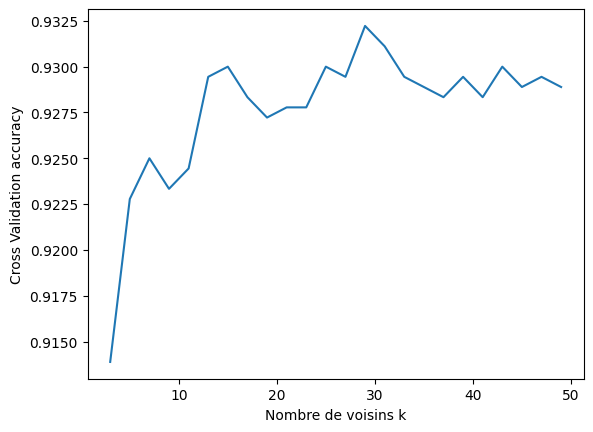

In [44]:
plt.plot(k_range, k_mean)
plt.xlabel('Nombre de voisins k')
plt.ylabel('Cross Validation accuracy')
plt.show()

In [45]:
k_max_index = k_mean.argmax()

In [46]:
k_max_index

13

In [47]:
best_k = k_range[k_max_index]

In [48]:
best_k

29

In [71]:
MSE = [1-x for x in k_mean]

<Figure size 640x480 with 0 Axes>

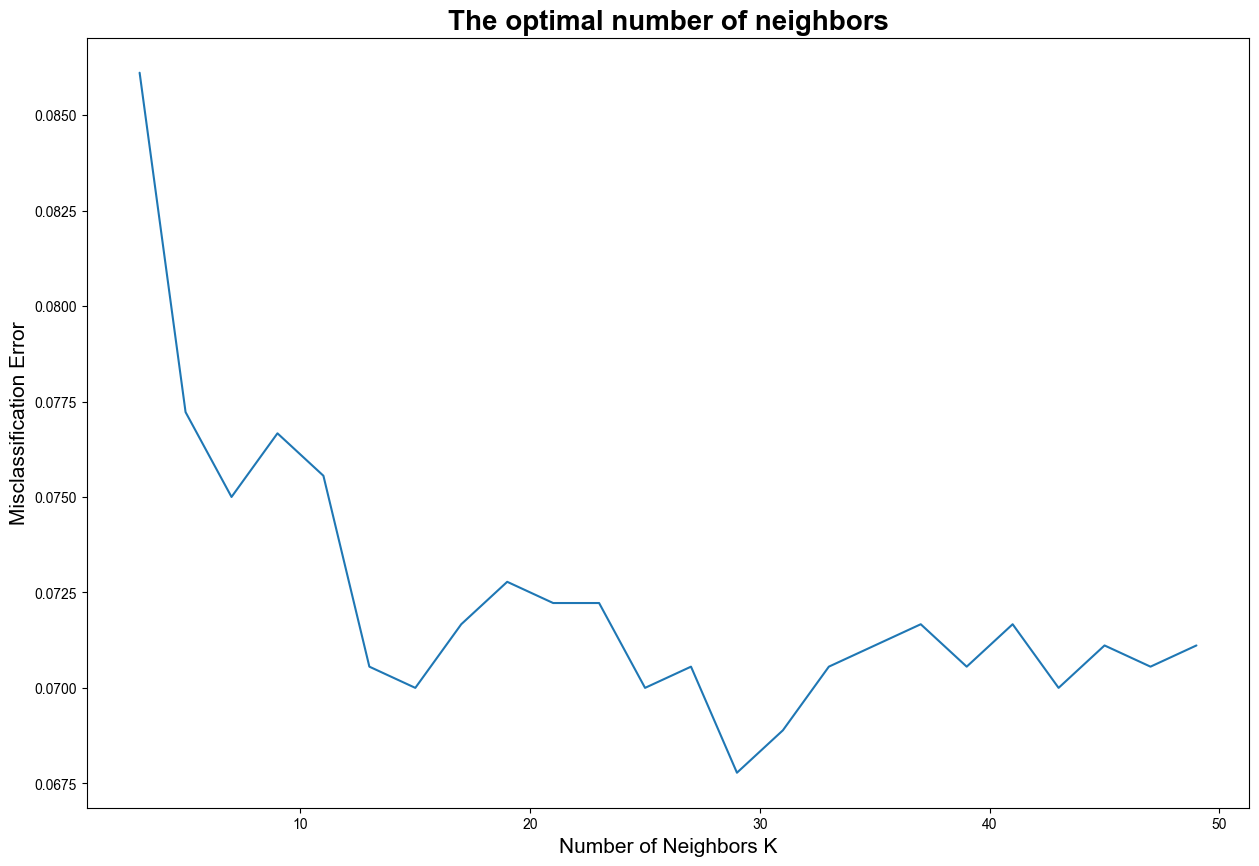

In [72]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_range, MSE)

plt.show()

In [49]:
_acc_scores = [ accuracy_score(Y_test, predict(X_test, i, X_train, Y_train)) for i in k_range ]

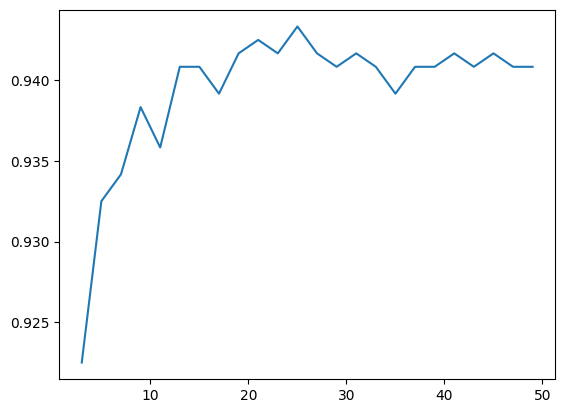

In [50]:
plt.plot(k_range, _acc_scores)
plt.show()

### Prédictions sur le meilleur k

In [51]:
_best_predictions = predict(X_test, best_k, X_train, Y_train)

In [52]:
_best_pred_table = pd.concat([X_test, Y_test, _best_predictions], axis=1)

In [53]:
_best_pred_table

,GeneOne,GeneTwo,CancerPresent,Prediction
793,4.8,6.4,0,1
1723,6.0,4.6,1,0
108,8.2,4.2,0,1
1382,4.4,8.2,0,0
2361,4.2,5.9,1,1
...,...,...,...,...
984,7.0,2.8,1,1
222,5.6,6.5,0,0
2972,9.3,5.5,1,1
742,5.7,6.8,0,0


In [54]:
_best_cm = confusion_matrix(Y_test, _best_predictions)

In [55]:
_best_cm

array([[564,  36],
       [ 35, 565]], dtype=int64)

<Axes: >

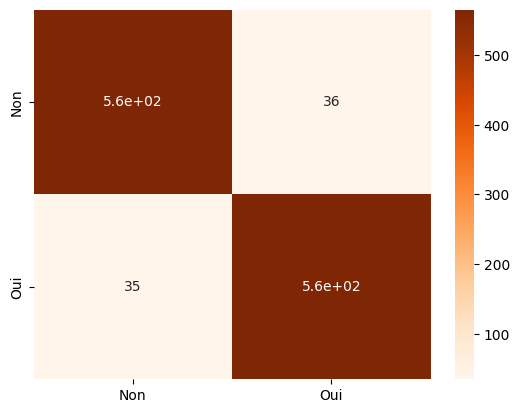

In [56]:
sns.heatmap(_best_cm, annot=True, cmap='Oranges', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])

In [57]:
accuracy_score(Y_test, _best_predictions)

0.9408333333333333

In [58]:
_best_corr_pred = _best_pred_table[_best_pred_table.Prediction == _best_pred_table.CancerPresent]
_best_wrg_pred = _best_pred_table[_best_pred_table.Prediction != _best_pred_table.CancerPresent]

In [59]:
_best_corr_pred

,GeneOne,GeneTwo,CancerPresent,Prediction
1382,4.4,8.2,0,0
2361,4.2,5.9,1,1
804,3.0,3.9,0,0
2057,5.1,3.7,1,1
2638,8.4,5.4,1,1
...,...,...,...,...
984,7.0,2.8,1,1
222,5.6,6.5,0,0
2972,9.3,5.5,1,1
742,5.7,6.8,0,0


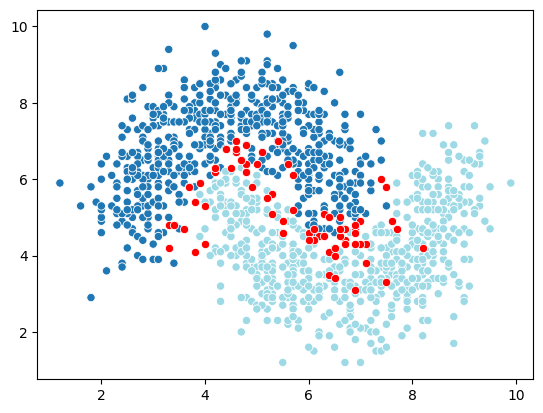

In [60]:
plt.scatter(data=_best_corr_pred, x='GeneOne',y='GeneTwo', c='Prediction', cmap='tab20', edgecolors='white', linewidth = 0.6)
plt.scatter(data=_best_wrg_pred, x='GeneOne', y='GeneTwo', color='red', edgecolors='white', linewidth = 0.6)
plt.show()

# Classification : Regression logistique

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression()

In [63]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [64]:
lr_pred = lr.predict(X_test)

In [65]:
lr_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [66]:
lr_cm = confusion_matrix(Y_test, lr_pred)

<Axes: >

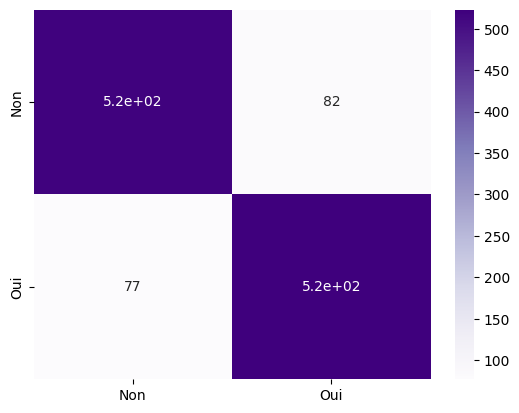

In [67]:
sns.heatmap(lr_cm, annot=True, cmap='Purples', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])

In [68]:
accuracy_score(lr_pred, Y_test)

0.8675